In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
from torchsummary import summary
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader
from PIL import Image
from IPython.display import display

In [2]:
from all_functions import *
from dataset import *
from models import *
from models_pyramid import *

# Загрузка весов модели

In [3]:
model1 = usual_conv()
summary(model1, (3,128,128))


model1.load_state_dict(torch.load('norm_mask.pt'))
model1.eval()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 20, 128, 128]             560
         MaxPool2d-2           [-1, 20, 64, 64]               0
            Conv2d-3           [-1, 48, 64, 64]           8,688
         MaxPool2d-4           [-1, 48, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          55,424
         MaxPool2d-6          [-1, 128, 16, 16]               0
            Conv2d-7            [-1, 5, 16, 16]           5,765
         MaxPool2d-8              [-1, 5, 8, 8]               0
Total params: 70,437
Trainable params: 70,437
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 6.26
Params size (MB): 0.27
Estimated Total Size (MB): 6.72
----------------------------------------------------------------


usual_conv(
  (first_conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (first_conv2): Conv2d(20, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (first_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (first_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=48, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (max_pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Linear(in_features=128, out_features=56, bias=True)
  (fc4): Linear(in_features=56, out_features=5, bias=True)
  (max_pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(48, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(128, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pooling3): MaxPool2d(kernel_size=2, stride=2, padd

In [4]:
model2 = quasy_yolo()
summary(model2, (3,128,128))

model2.load_state_dict(torch.load('quazy_mask.pt'))
model2.eval()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 20, 128, 128]             560
         MaxPool2d-2           [-1, 20, 64, 64]               0
            Conv2d-3           [-1, 48, 64, 64]           8,688
         MaxPool2d-4           [-1, 48, 32, 32]               0
           Flatten-5             [-1, 48, 1024]               0
            Linear-6             [-1, 1024, 64]           3,136
         LeakyReLU-7             [-1, 1024, 64]               0
            Linear-8            [-1, 1024, 128]           8,320
         LeakyReLU-9            [-1, 1024, 128]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
          Flatten-11             [-1, 128, 256]               0
           Linear-12              [-1, 256, 56]           7,224
        LeakyReLU-13              [-1, 256, 56]               0
           Linear-14               [-1,

quasy_yolo(
  (first_conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (first_conv2): Conv2d(20, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (first_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (first_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=48, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (max_pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Linear(in_features=128, out_features=56, bias=True)
  (fc4): Linear(in_features=56, out_features=5, bias=True)
  (max_pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (convs): ModuleList(
    (0): quasi_conv(
      (flatten): Flatten(start_dim=2, end_dim=-1)
      (relu): LeakyReLU(negative_slope=0.01)
      (fc1): Linear(in_features=48, out_features=64, bias=True)
      (fc

In [5]:
model3 = pyramid_yolo()
summary(model3, (3,128,128))

model3.load_state_dict(torch.load('pyramid_mask.pt'))
model3.eval()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 15, 128, 128]             420
         MaxPool2d-2           [-1, 15, 64, 64]               0
            Conv2d-3           [-1, 18, 64, 64]           2,448
       BatchNorm2d-4           [-1, 18, 64, 64]              36
              ReLU-5           [-1, 18, 64, 64]               0
            Conv2d-6           [-1, 18, 64, 64]           2,448
       BatchNorm2d-7           [-1, 18, 64, 64]              36
              ReLU-8           [-1, 18, 64, 64]               0
            Conv2d-9           [-1, 18, 64, 64]           2,448
      BatchNorm2d-10           [-1, 18, 64, 64]              36
             ReLU-11           [-1, 18, 64, 64]               0
           Conv2d-12           [-1, 18, 64, 64]           2,448
      BatchNorm2d-13           [-1, 18, 64, 64]              36
             ReLU-14           [-1, 18,

pyramid_yolo(
  (first_conv1): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convs): pyramid_conv(
    (pconv1): Conv2d(15, 18, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
    (pconv2): Conv2d(15, 18, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4))
    (pconv3): Conv2d(15, 18, kernel_size=(3, 3), stride=(1, 1), padding=(8, 8), dilation=(8, 8))
    (pconv4): Conv2d(15, 18, kernel_size=(3, 3), stride=(1, 1), padding=(12, 12), dilation=(12, 12))
    (bn1): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn4): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer_conv_31): Conv2d(72, 144, kernel_size=(1, 1), stride=(1, 1))
    (layer_activation_31): LeakyReLU(negative_slope

# Демонстрация работы модели

In [6]:
def transform_image(image):
    transform = transforms.Compose(
            [
                transforms.Resize((128,128)),
        #         transforms.ToTensor()
            ]
    )
    
    im = torch.Tensor([image])/255.0
    print(im)
    resolution = 256
    print(resolution)
    reshaped = im.reshape((-1,3,resolution,resolution))
    
    reshaped = transform(reshaped)

    return reshaped

Загрузка изображения


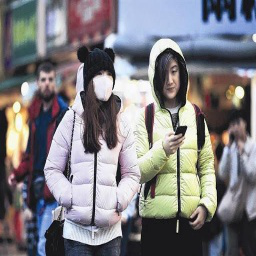

In [7]:
print('Загрузка изображения')
image = Image.open('D:/images/train/maksssksksss0.jpg')

display(image)

In [9]:
image = cv2.imread('D:/images/train/maksssksksss9.jpg')
##### Приведение изображения к виду, который модель принимает на вход
print('Приведение изображения к виду, который модель принимает на вход')
transformed = transform_image(image)
print(transformed.shape)

print()
###### Применение модели
results = model3(transformed)

###### Приведение результатов модели к виду финального тензора
results = results.permute(0, 2, 3, 1)
print('Приведение результатов модели к виду финального тензора')
print(results.shape)

print()

###### Финальный тензор
print('Финальный тензор')
print(results)

print()

###### Нахождение bounding boxes по финальному тензору
print('Нахождение bounding boxes по финальному тензору')
tensor=results[0,:,:,:].detach().numpy()
tensor_border=border(tensor,0.5)
print(tensor_border)

print()

# ###### Визуализация результата
# print('Визуализация результата')
# visual(tensor_border, image.astype(np.uint8))

# print()



Приведение изображения к виду, который модель принимает на вход
tensor([[[[0.6431, 0.6235, 0.5647],
          [0.6431, 0.6235, 0.5647],
          [0.6431, 0.6235, 0.5647],
          ...,
          [0.4588, 0.3765, 0.2902],
          [0.4588, 0.3765, 0.2902],
          [0.4627, 0.3804, 0.2941]],

         [[0.6627, 0.6431, 0.5843],
          [0.6627, 0.6431, 0.5843],
          [0.6667, 0.6471, 0.5882],
          ...,
          [0.4588, 0.3765, 0.2902],
          [0.4627, 0.3804, 0.2941],
          [0.4667, 0.3843, 0.2980]],

         [[0.6902, 0.6627, 0.5961],
          [0.6941, 0.6667, 0.6000],
          [0.6941, 0.6667, 0.6078],
          ...,
          [0.4510, 0.3686, 0.2824],
          [0.4510, 0.3686, 0.2824],
          [0.4549, 0.3725, 0.2863]],

         ...,

         [[0.5451, 0.5020, 0.3961],
          [0.5451, 0.5020, 0.3961],
          [0.5451, 0.5020, 0.3961],
          ...,
          [0.8196, 0.7490, 0.6824],
          [0.8235, 0.7451, 0.6784],
          [0.8314, 0.7529, 

# Функции вывода

In [165]:
dataset_IoU = DatasetTensor('D:/images/IOU/',0.1,0.125,0.125)
loader_train_discriminator = DataLoader(dataset_IoU, batch_size=10, shuffle=False)

In [166]:
# (accuracy, precision, recall, f1)
IoU(loader_train_discriminator, model1, 0.03, 0.3)

(' accuracy = ',
 0.5,
 ' precision = ',
 0.5,
 ' recall = ',
 0.03125,
 ' f1 = ',
 0.058823529411764705)

In [169]:
# (accuracy, precision, recall, f1)
IoU(loader_train_discriminator, model2, 0.02, 0.2)

(' accuracy = ',
 0.015625,
 ' precision = ',
 0.3333333333333333,
 ' recall = ',
 0.016129032258064516,
 ' f1 = ',
 0.03076923076923077)

In [176]:
# (accuracy, precision, recall, f1)
IoU(loader_train_discriminator, model3, 0.8, 0.75)

(' accuracy = ', 1.0, ' precision = ', 1.0, ' recall = ', 1.0, ' f1 = ', 1.0)

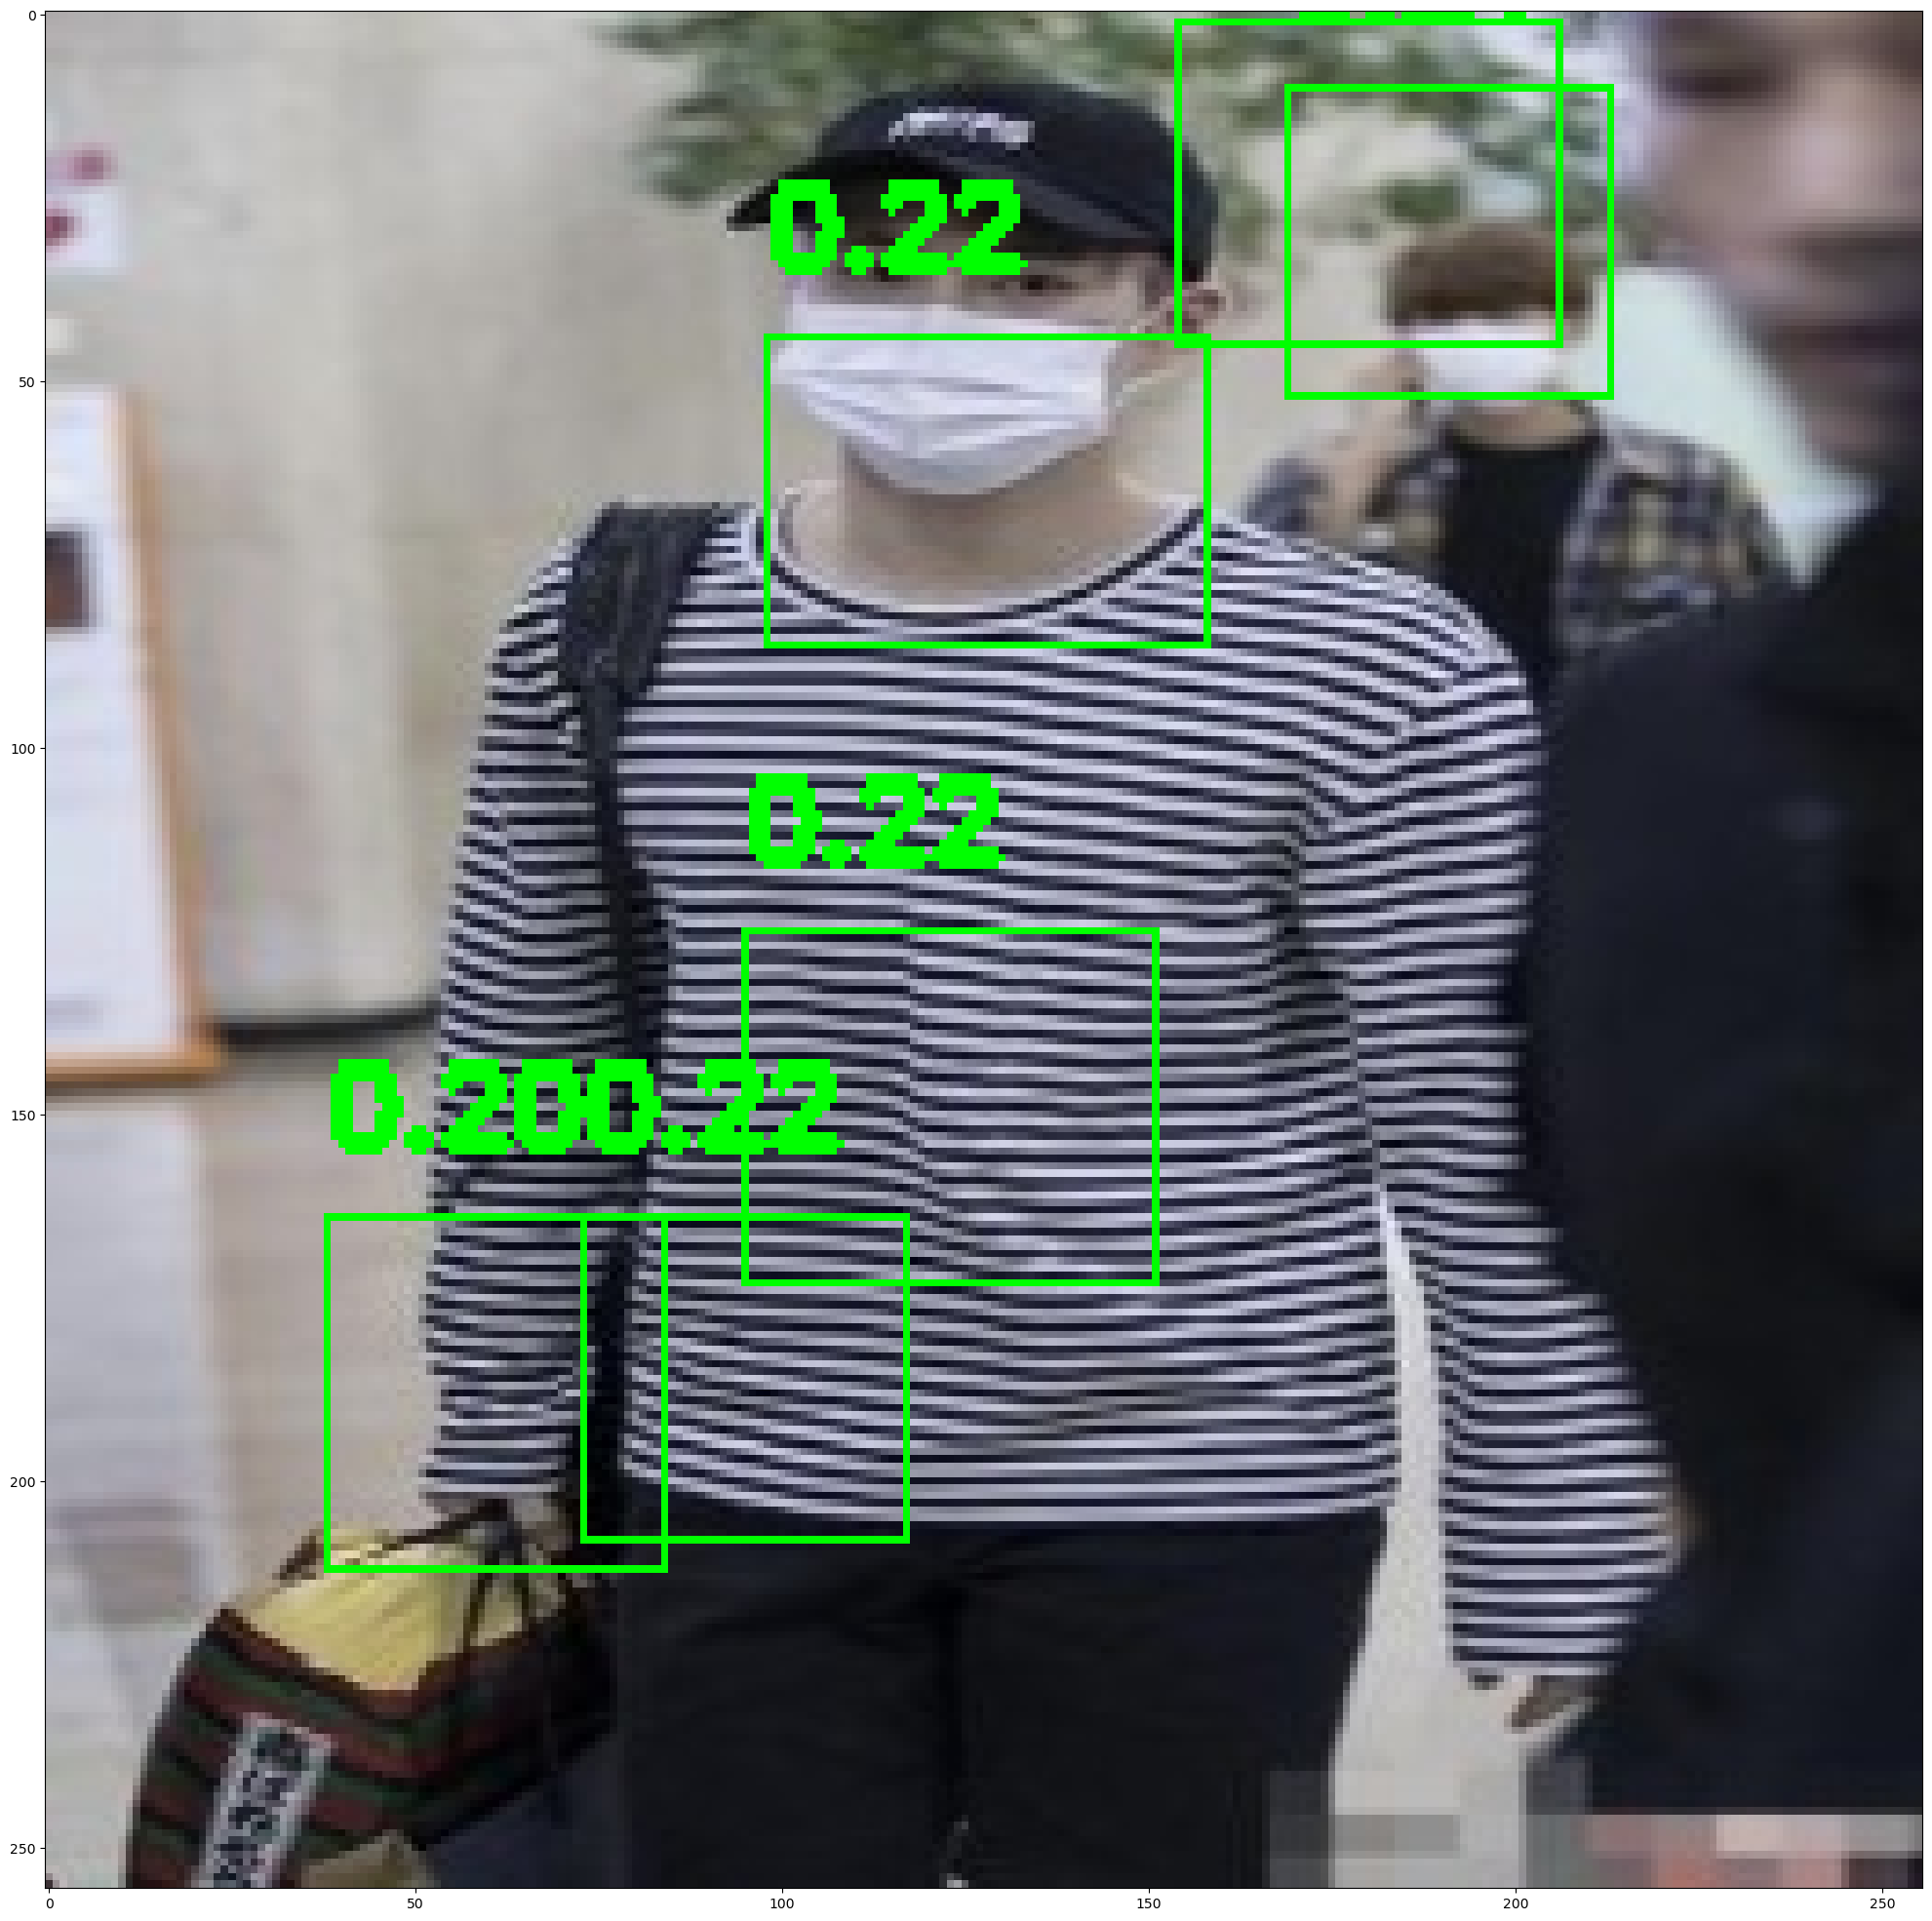

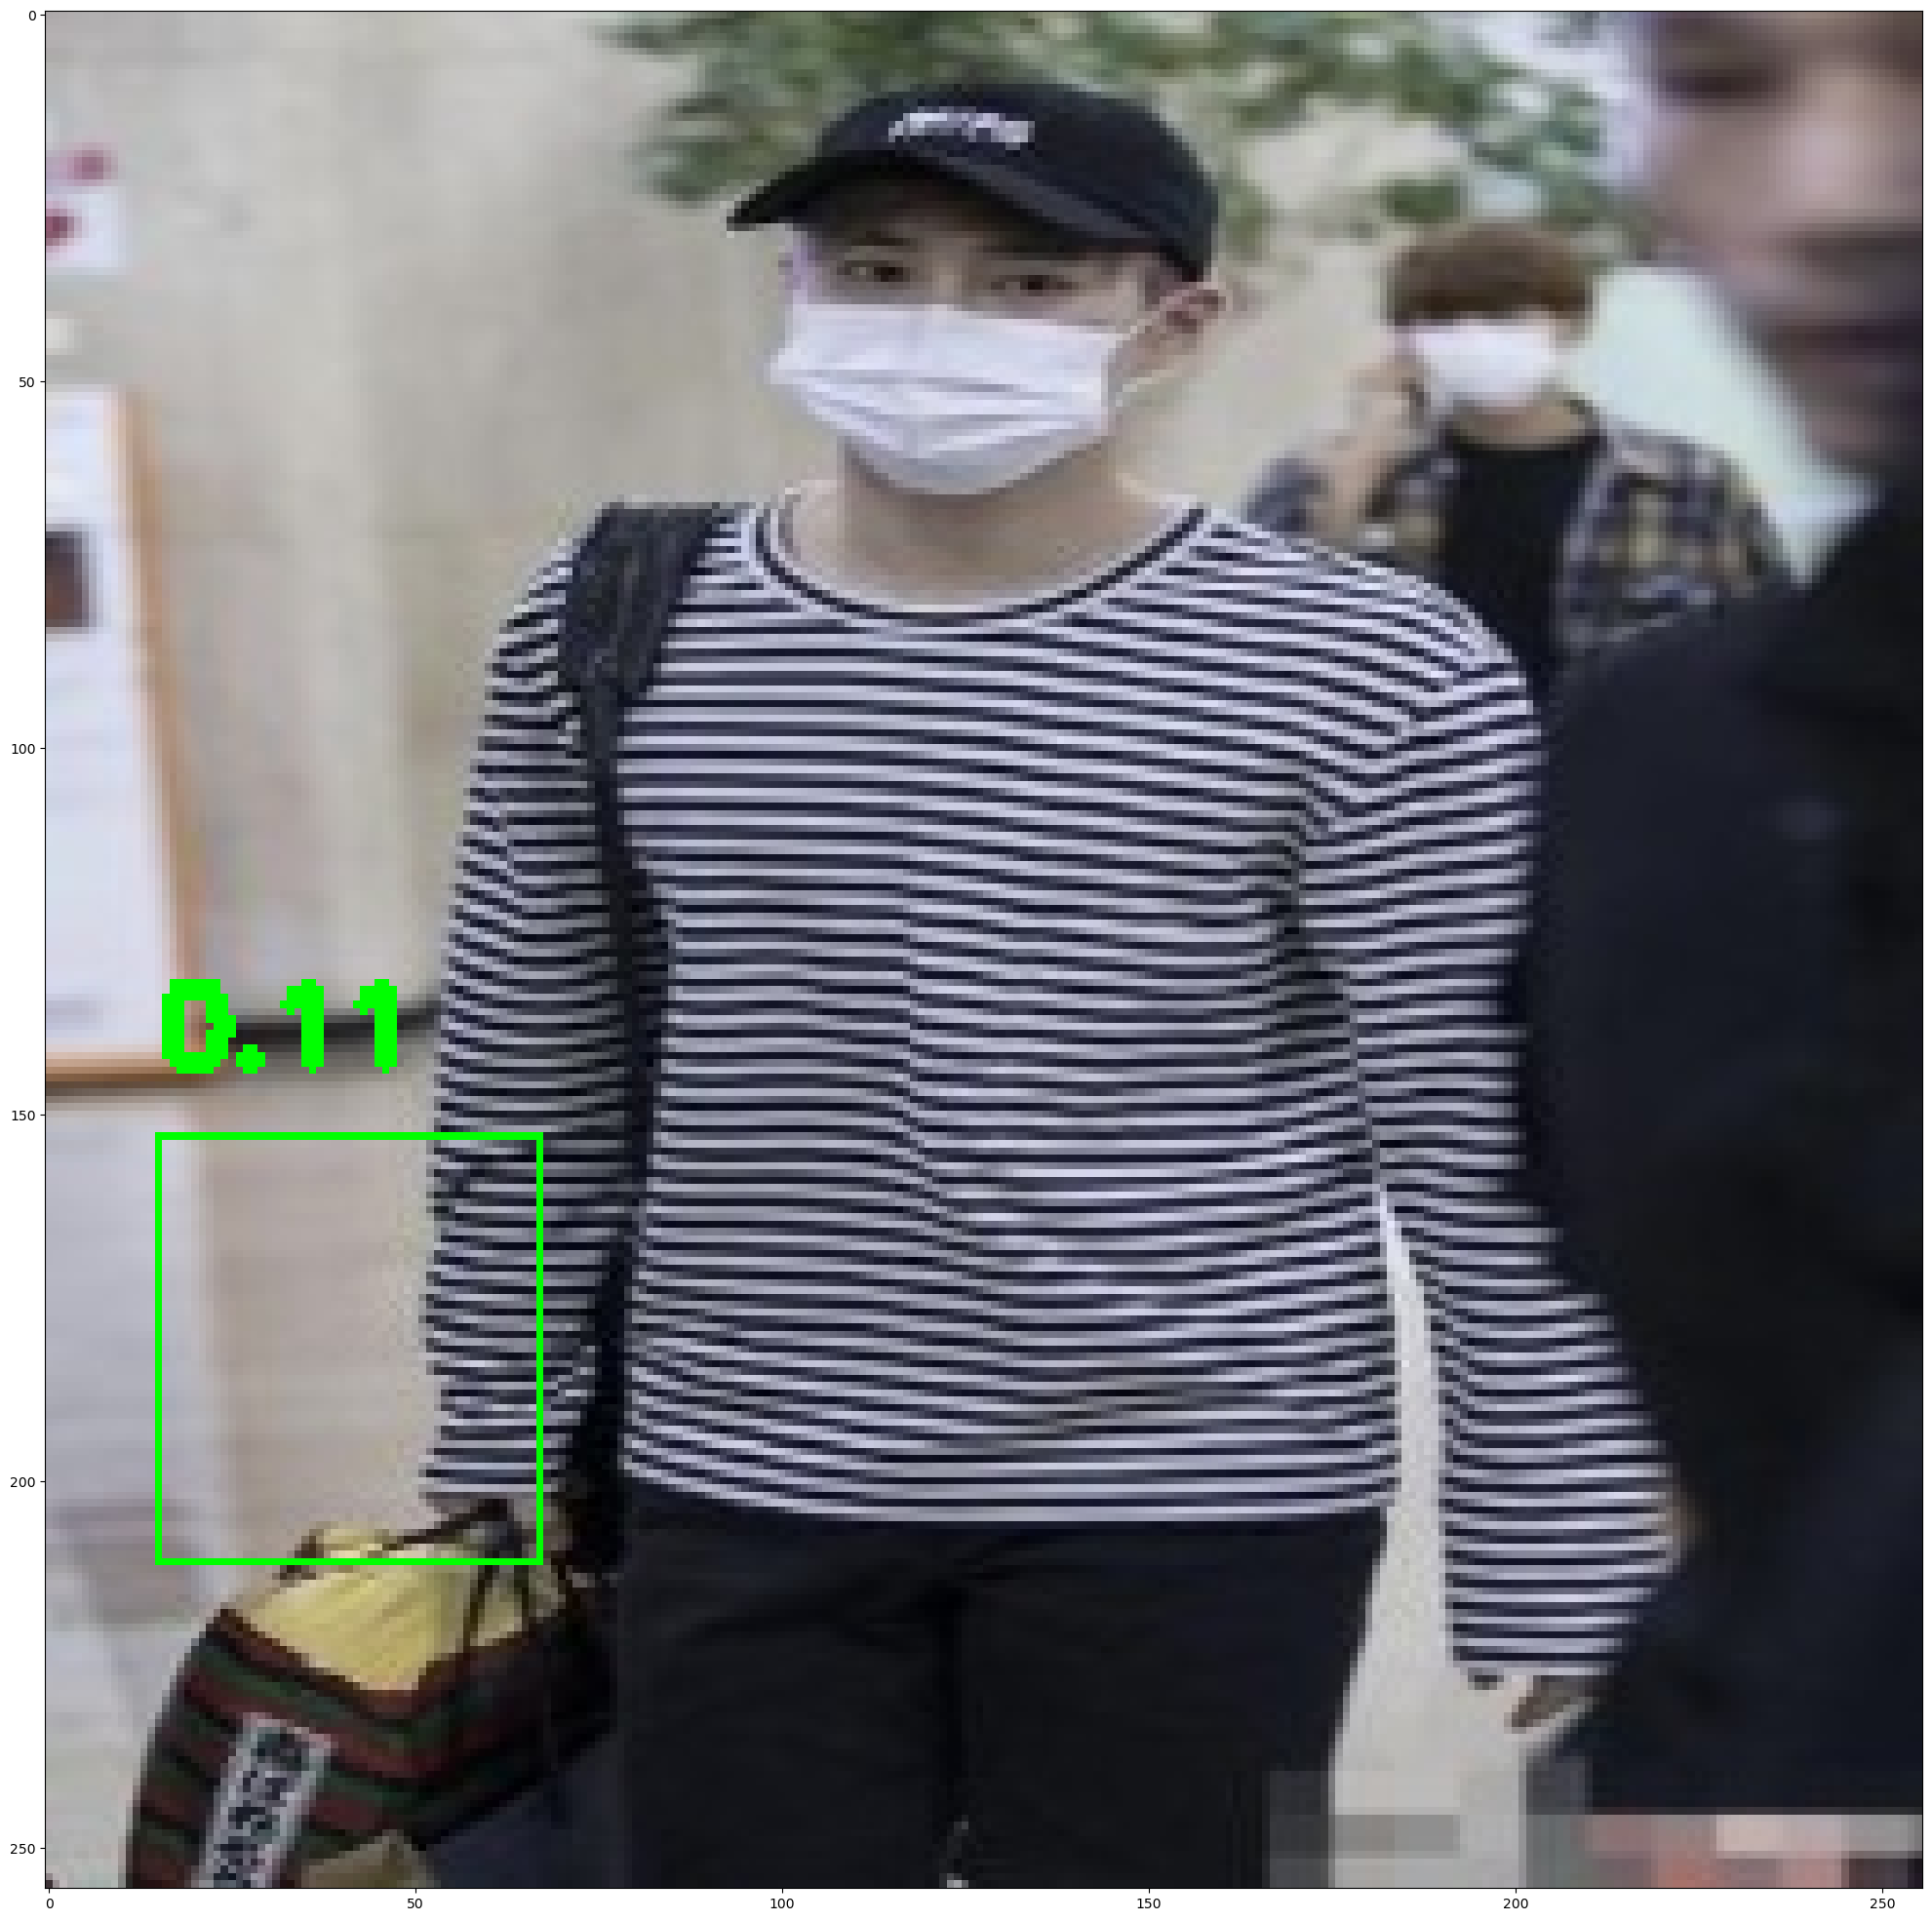

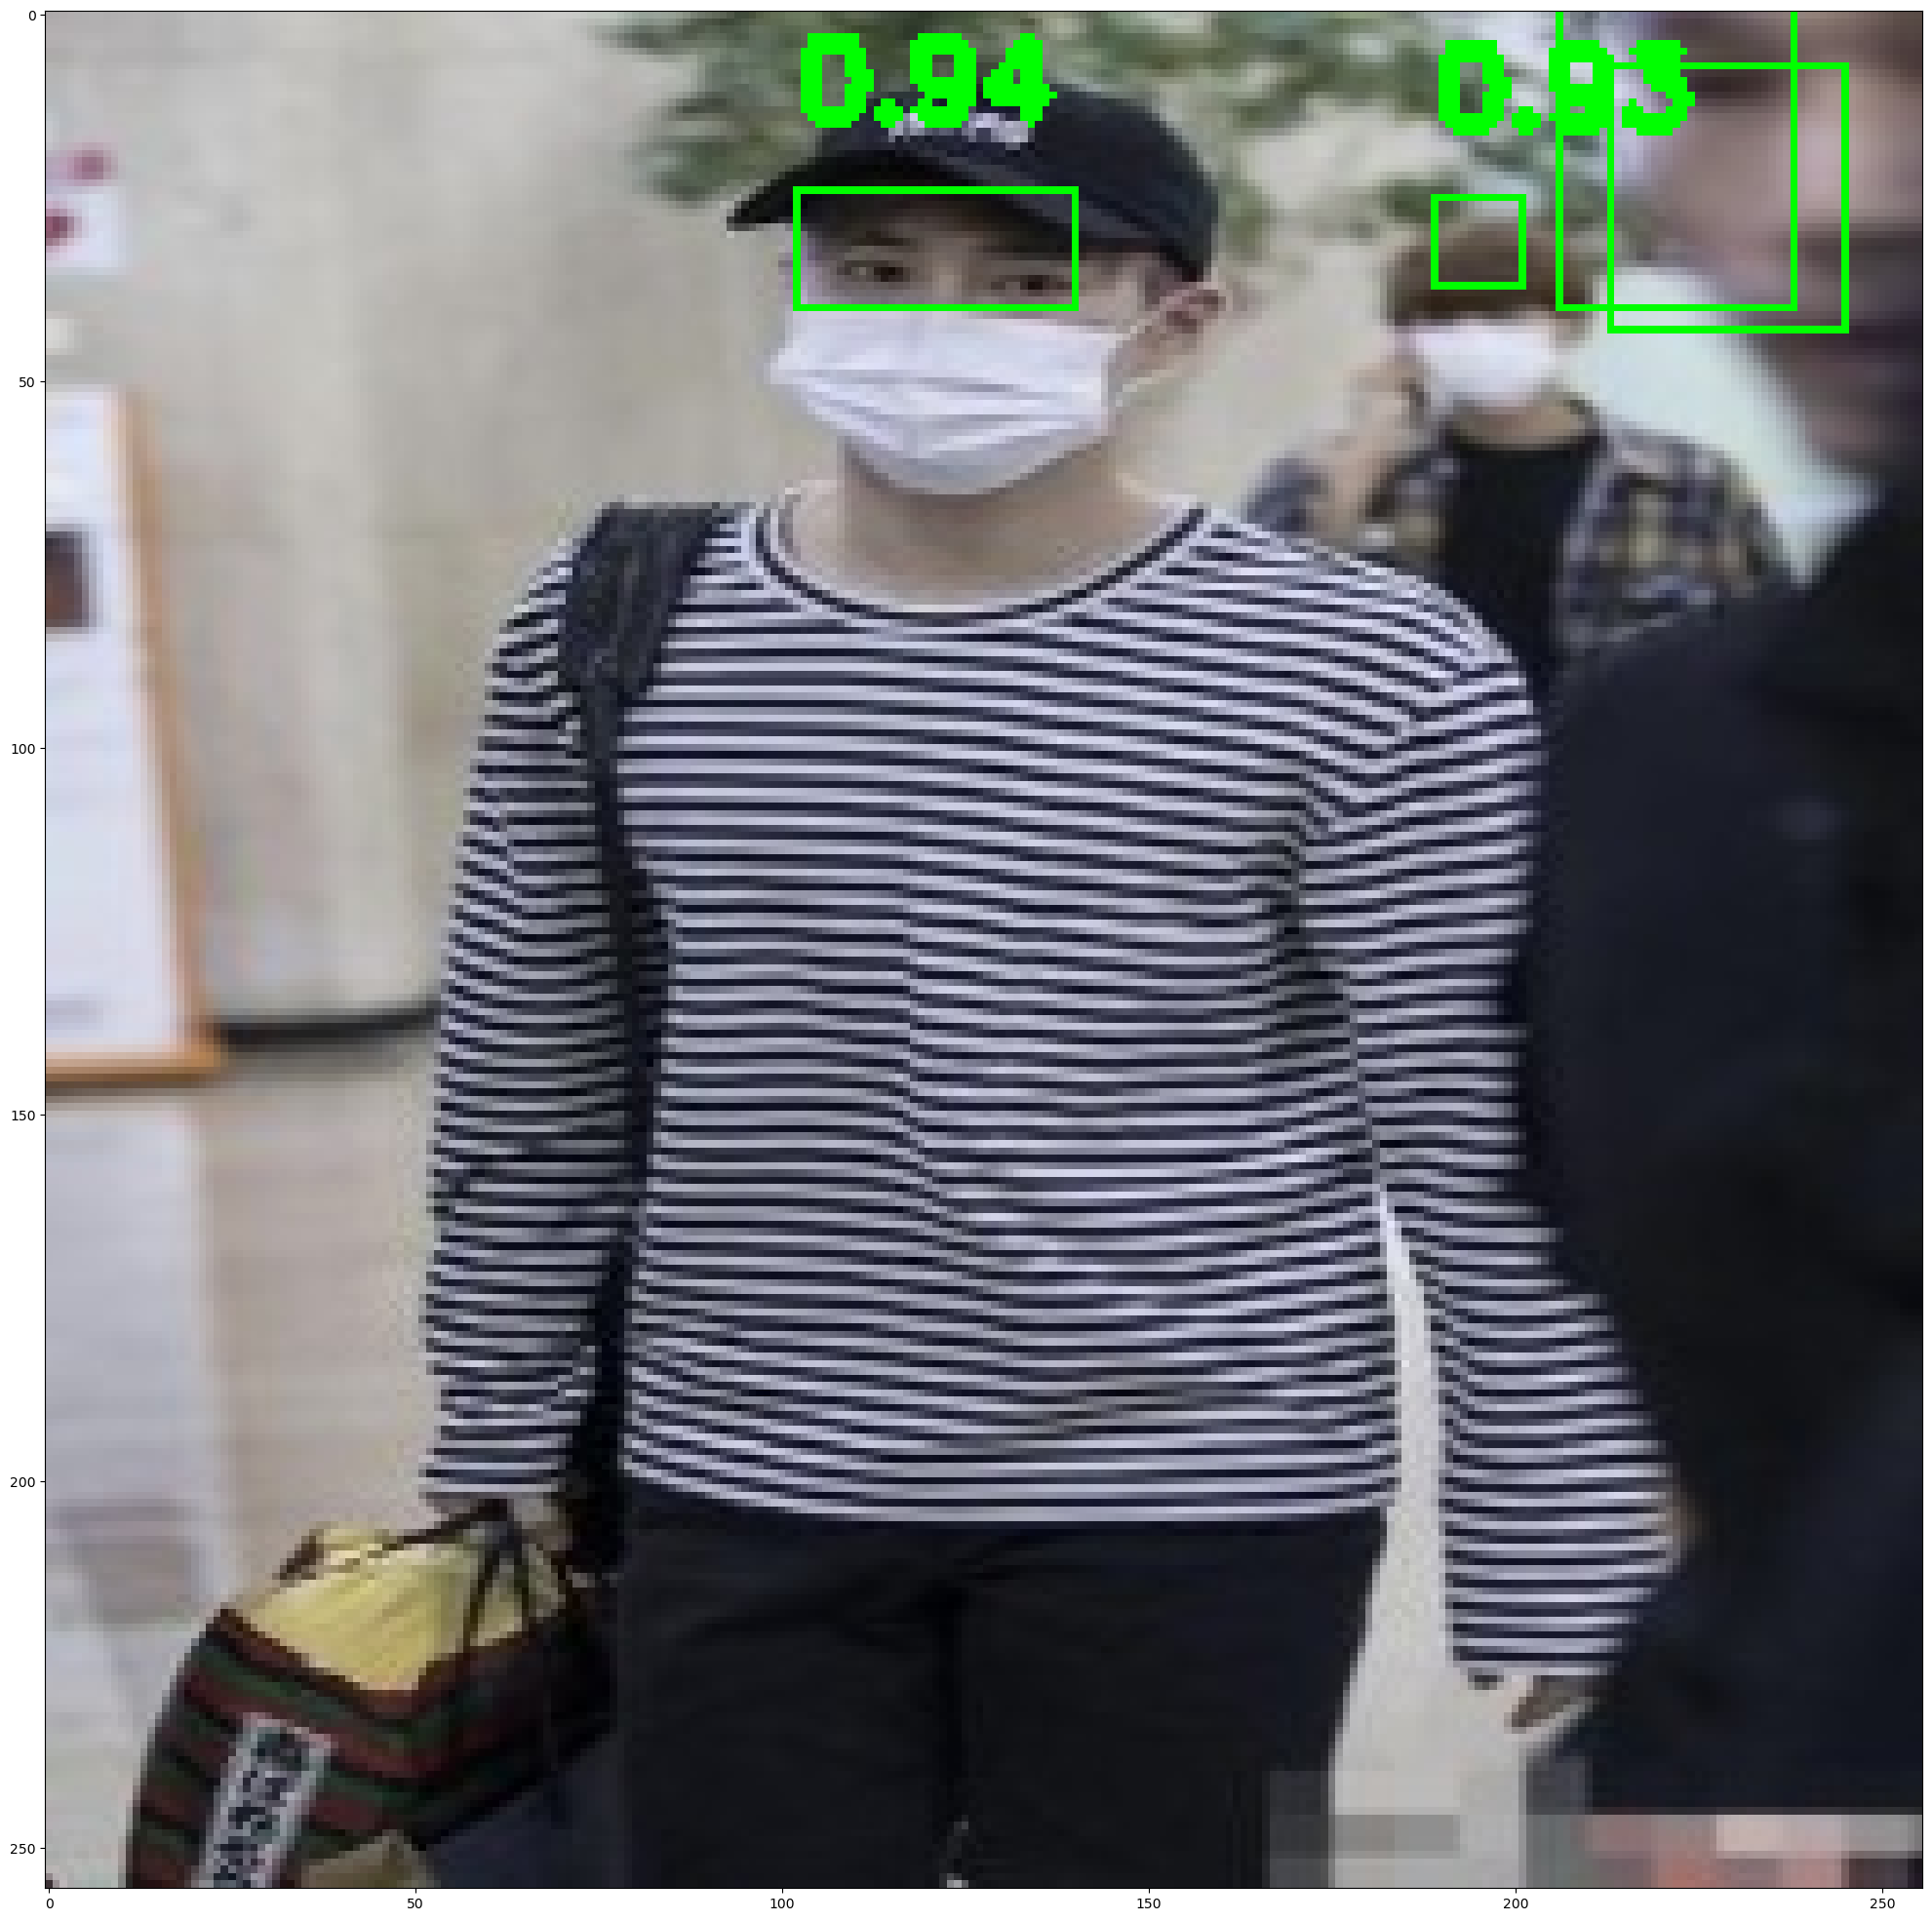

In [180]:
# Путь к изображению
image_path = "D:/images/show/maksssksksss126.jpg"
# Вызов функции detect_objects_conv для каждой модели
detect_objects_conv(image_path, model1, 0.2)
detect_objects_conv(image_path, model2, 0.1)
detect_objects_conv(image_path, model3, 0.5)

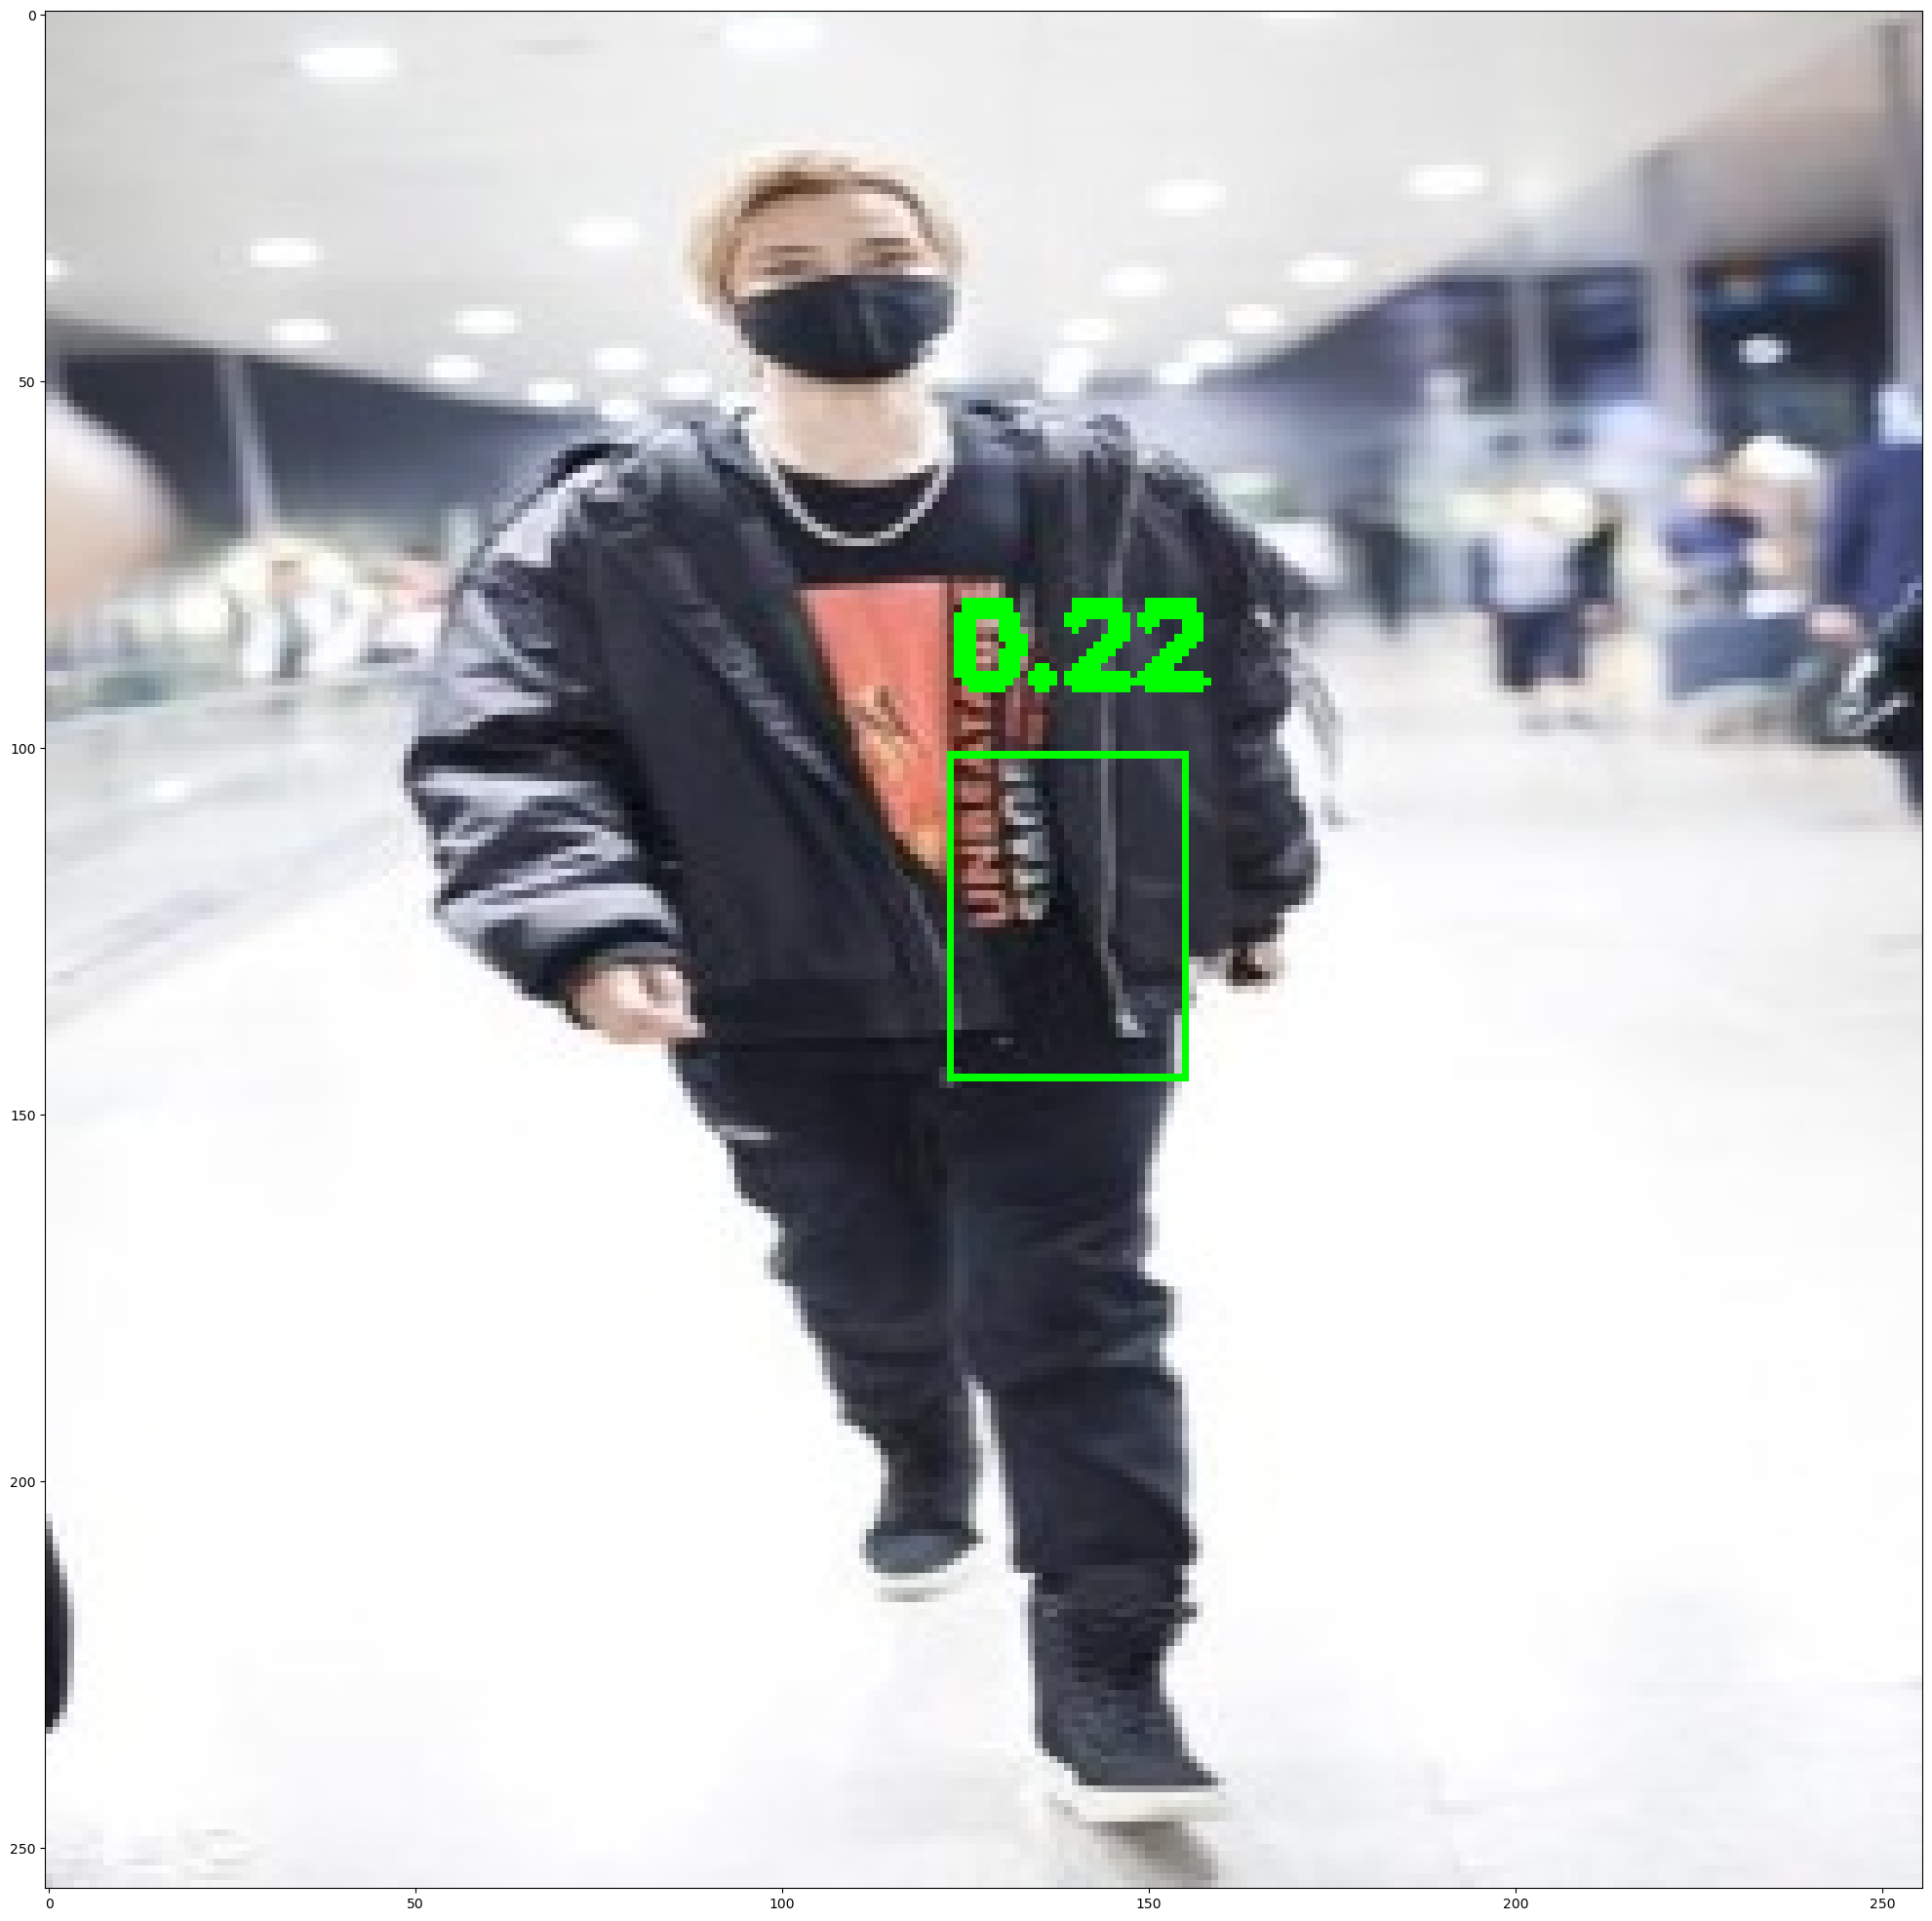

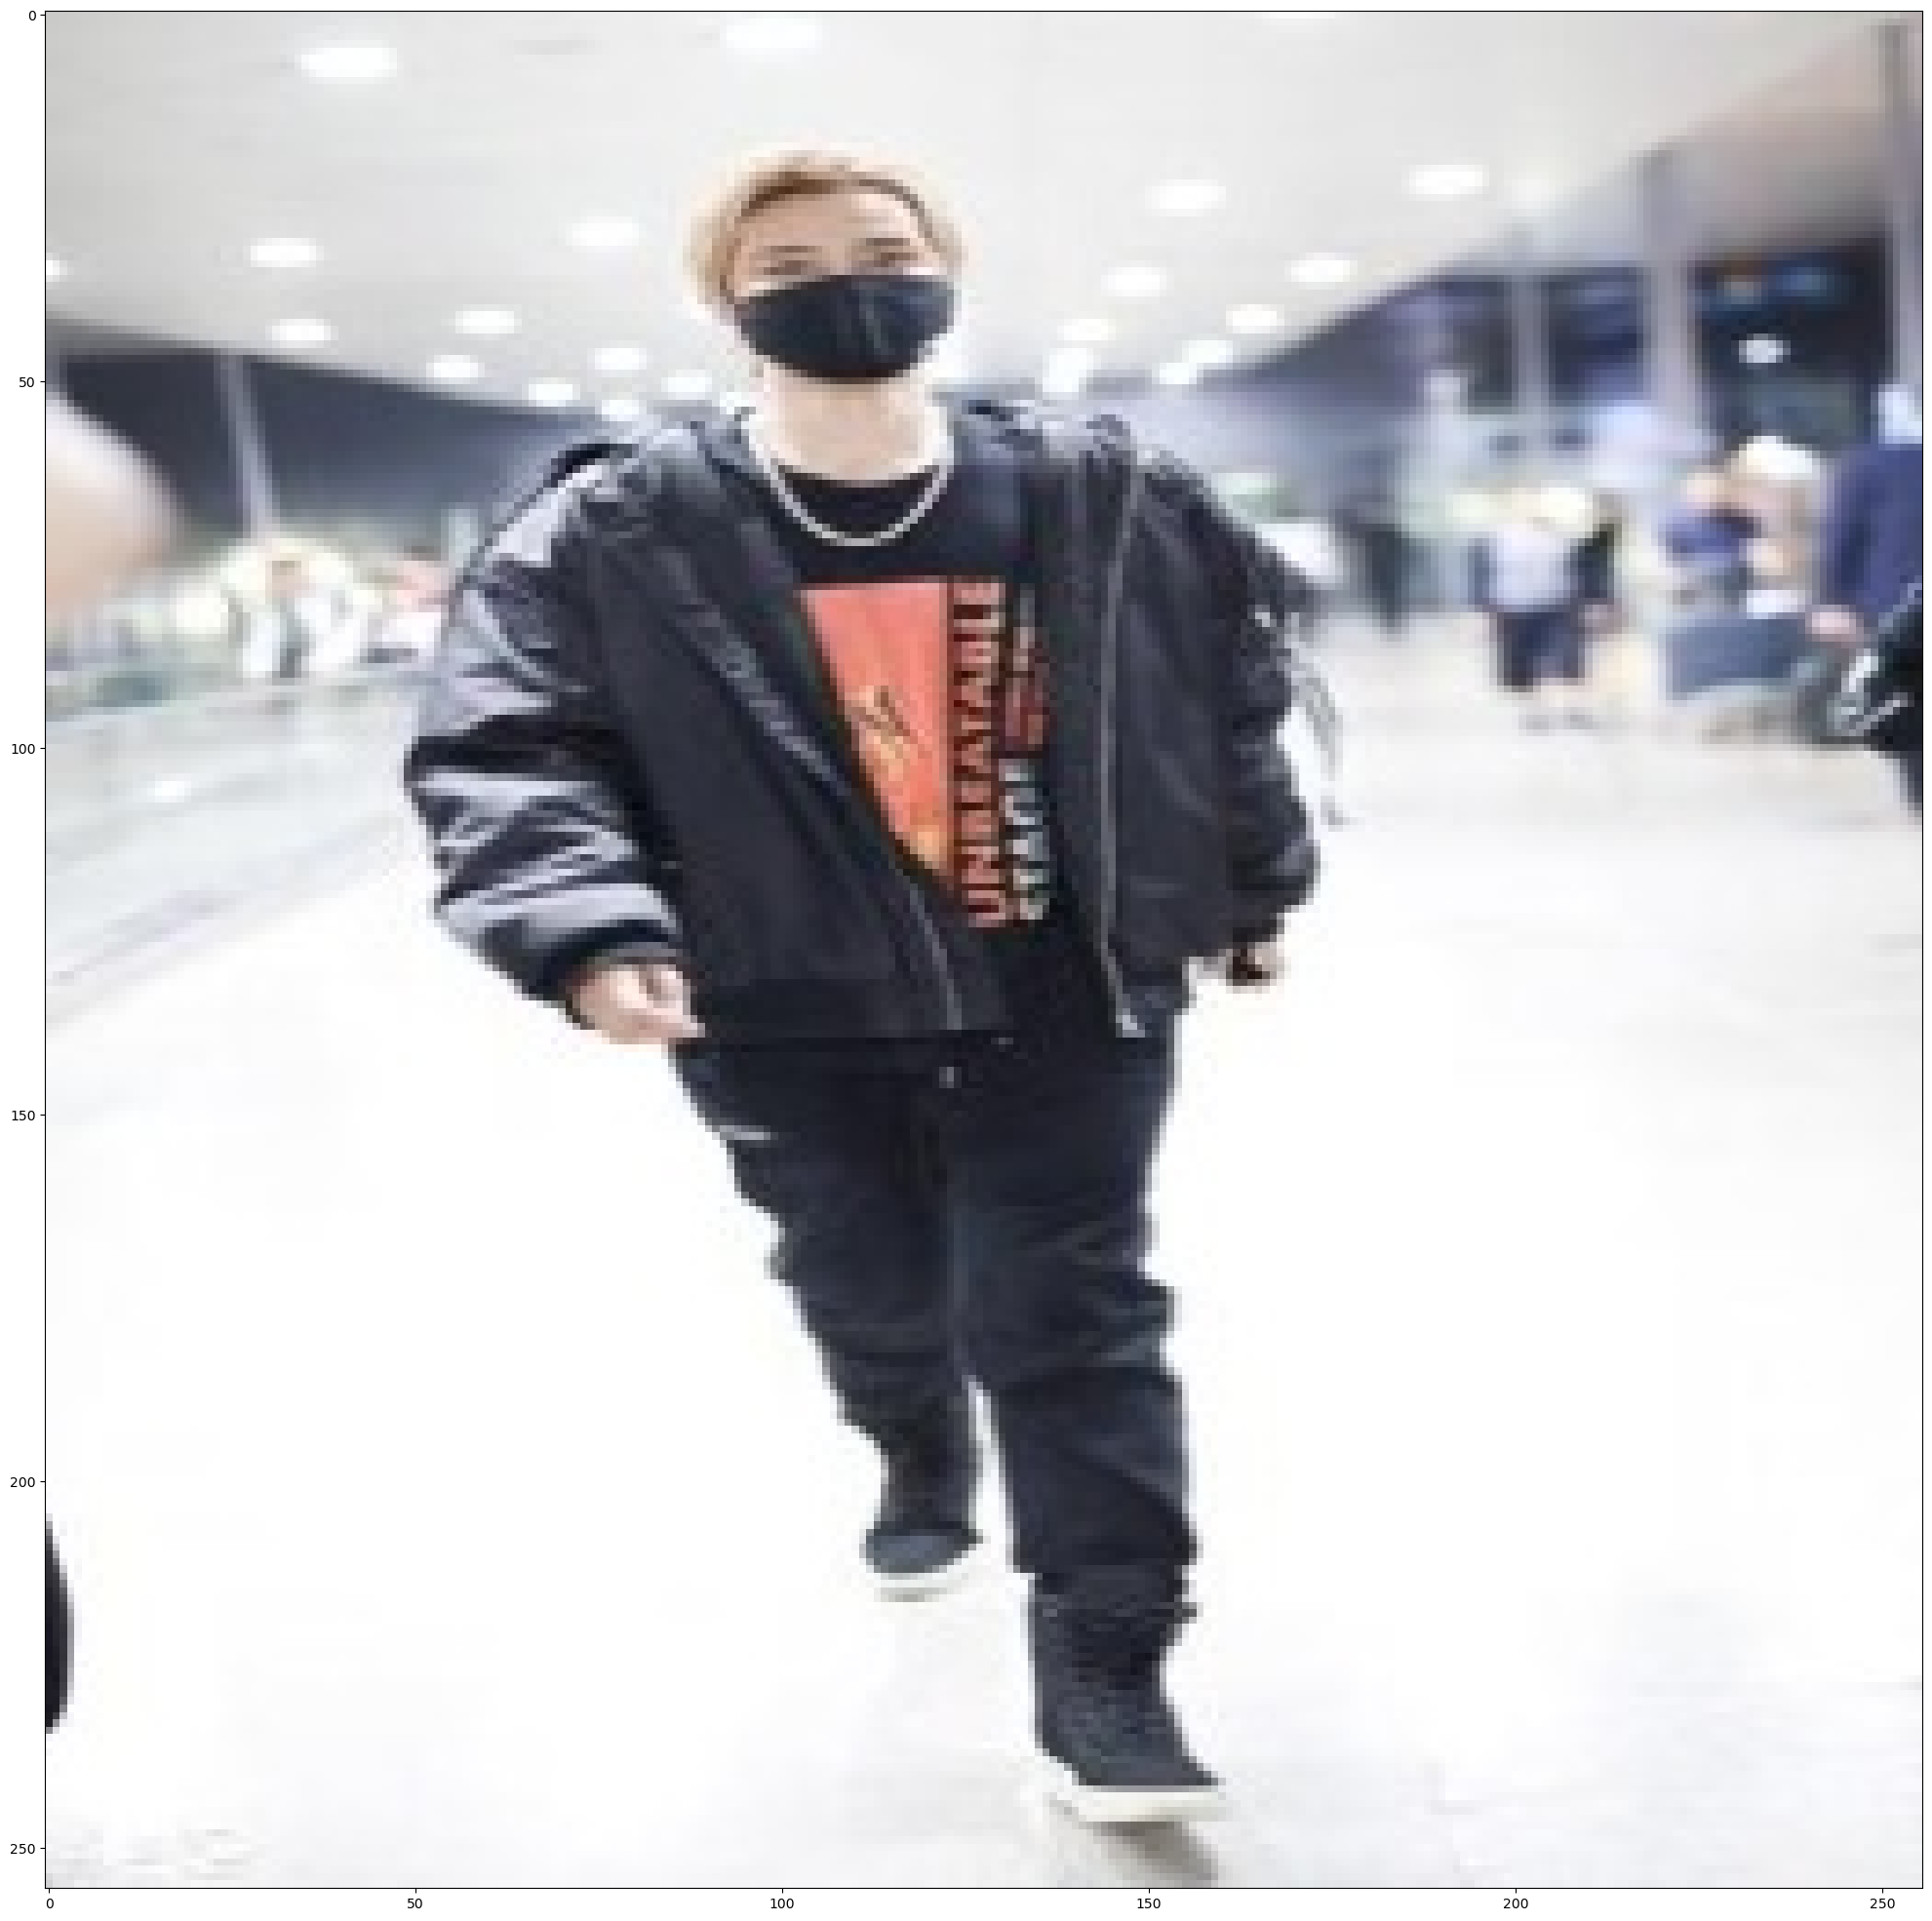

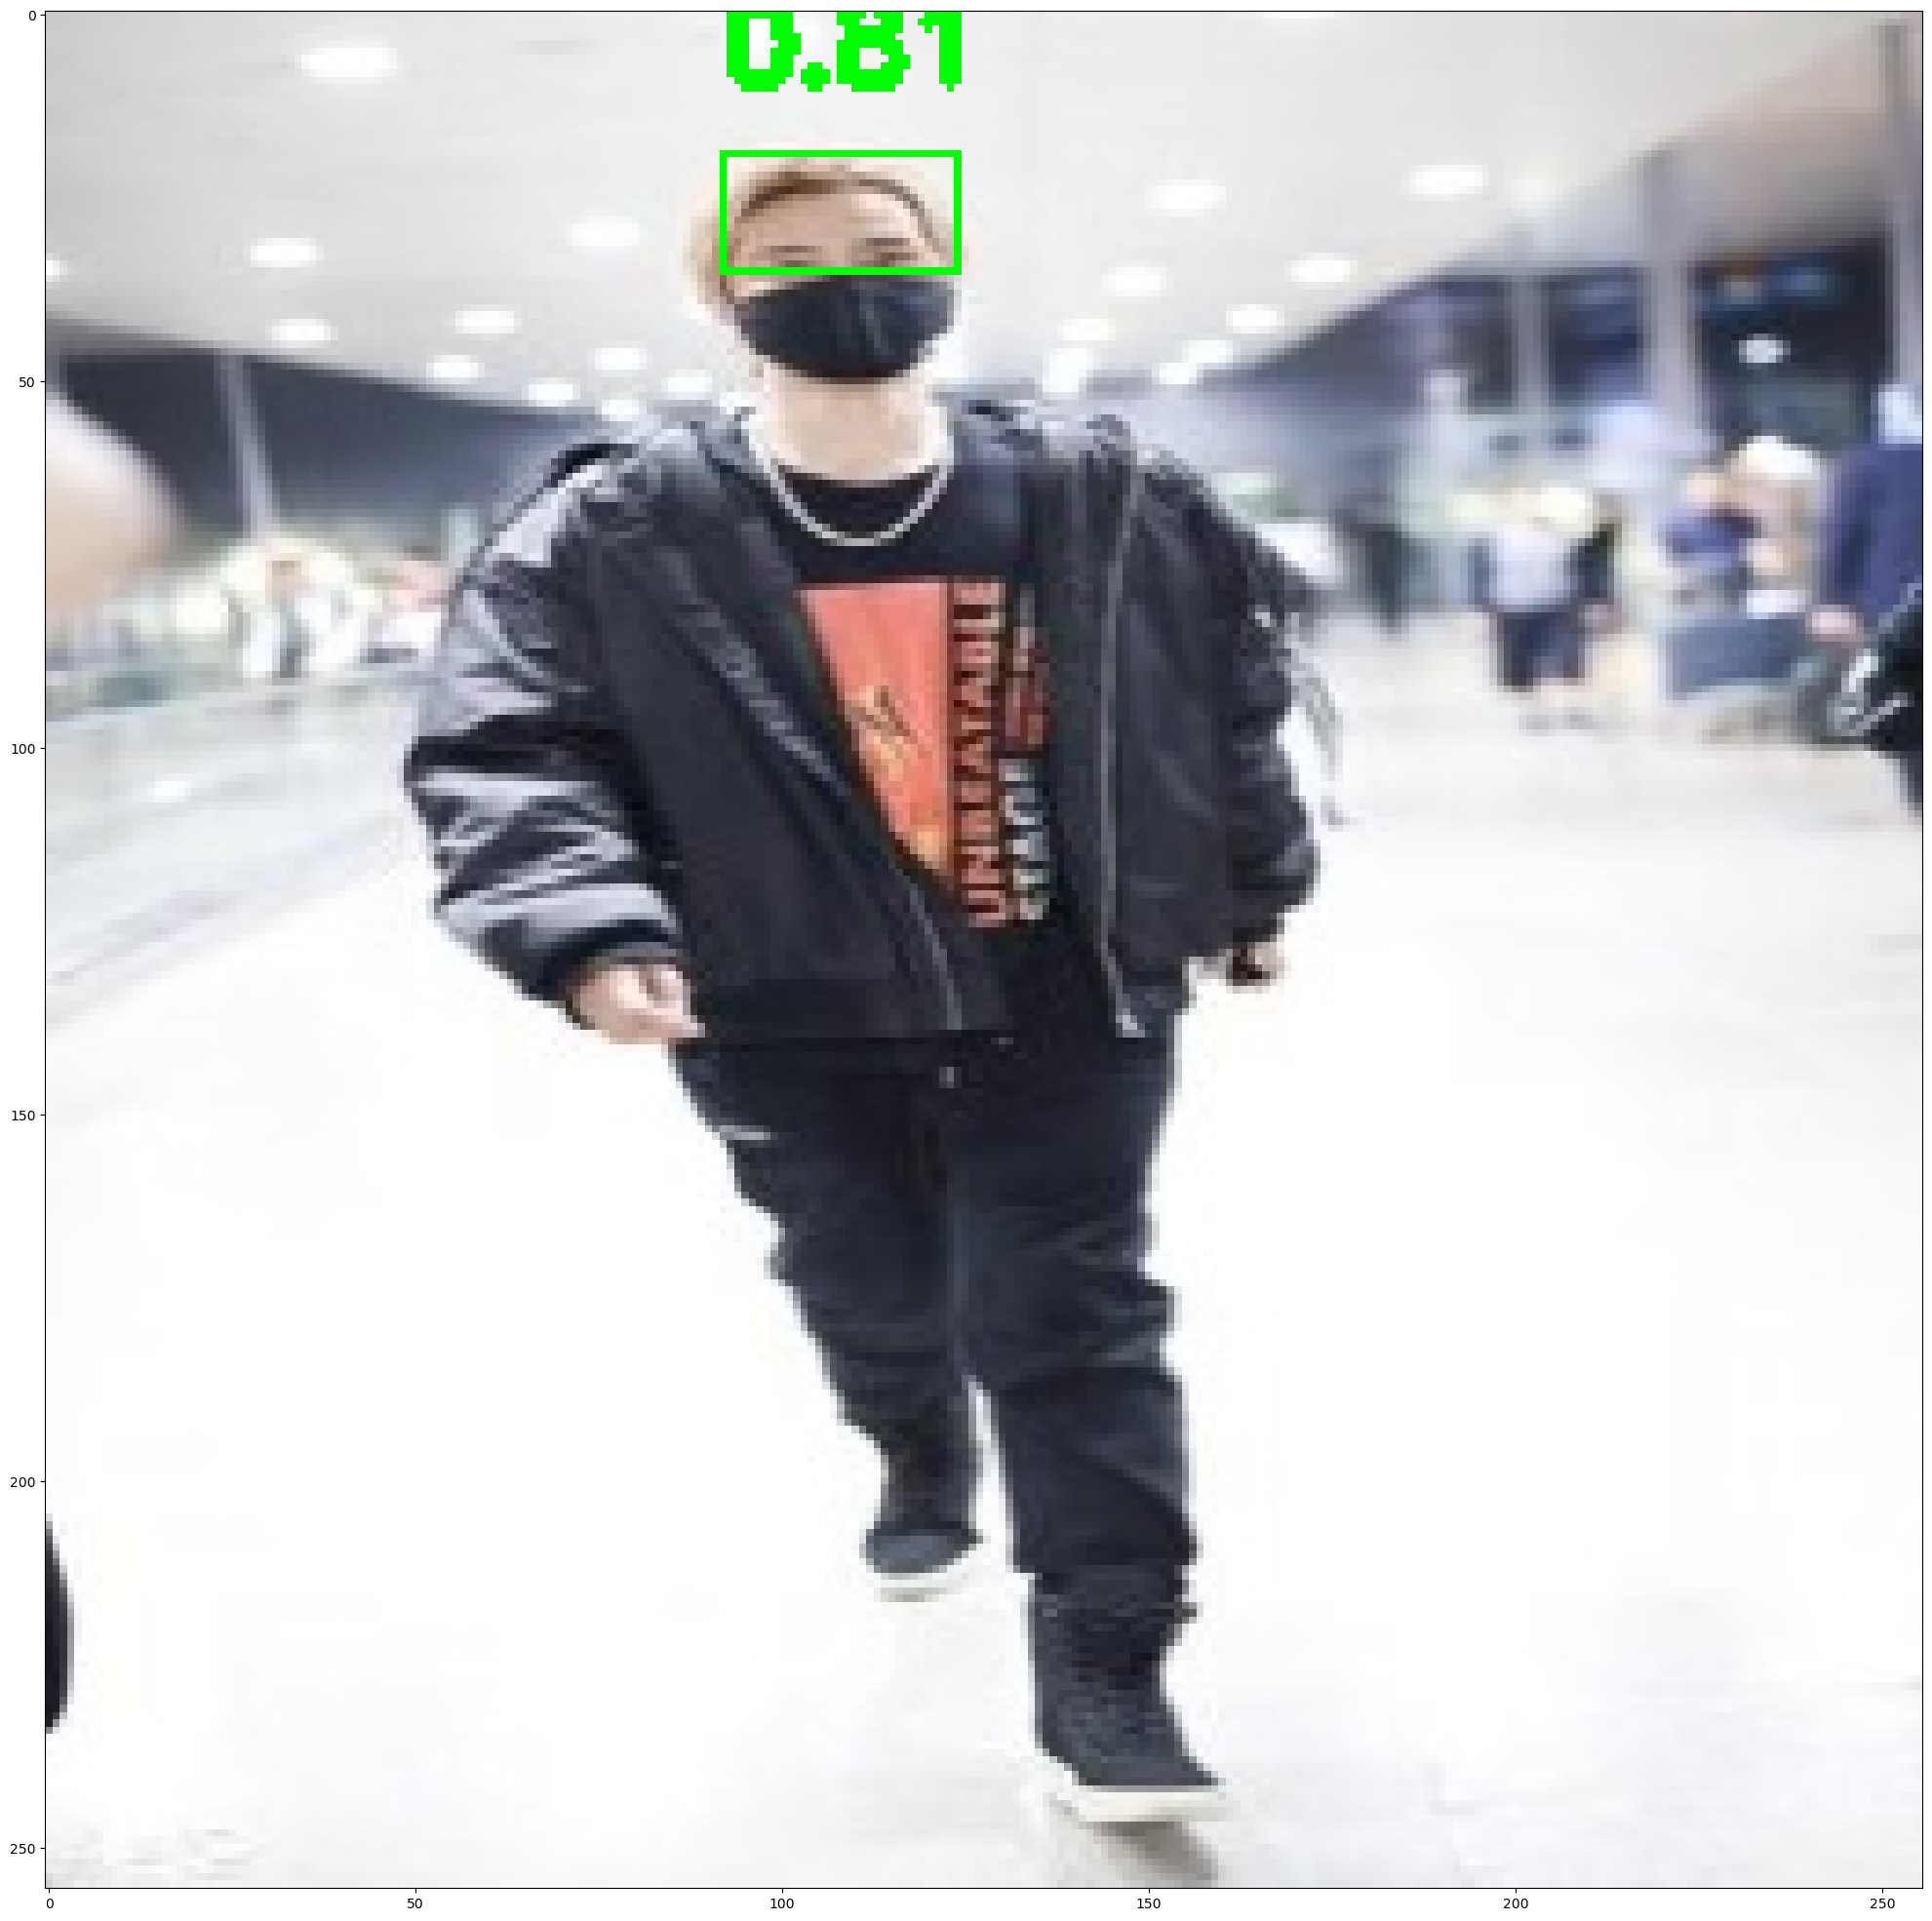

In [177]:
# Путь к изображению
image_path = "D:/images/show/maksssksksss127.jpg"
# Вызов функции detect_objects_conv для каждой модели
detect_objects_conv(image_path, model1, 0.2)
detect_objects_conv(image_path, model2, 0.1)
detect_objects_conv(image_path, model3, 0.5)